In [1]:
import numpy as np
import matplotlib.pyplot as plt

shape = (10)

bce, L1, SE, KLDiv, Huber, SmoothL1, Wing, Softmargin

In [2]:
np.random.seed(42)
y_pred = np.random.rand(shape)
y_pred

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [3]:
np.random.seed(42)
y_true = np.random.randint(2, size=shape, dtype=bool)
y_true

array([False,  True,  True, False, False,  True,  True, False, False,
       False])

In [4]:
space = np.linspace(0.02, 0.98, 49)

## BCE

$$
- \frac{1}{N}\sum_{i=1}^N (y_i log(p_i) + (1 - y_i) (1 - log(p_i)))
$$

In [5]:
def BCE(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def BCE_plotting(true, pred):
    return -(true * np.log(pred) + (1 - true) * np.log(1 - pred))

In [6]:
BCE(y_true, y_pred)

1.0779729426556064

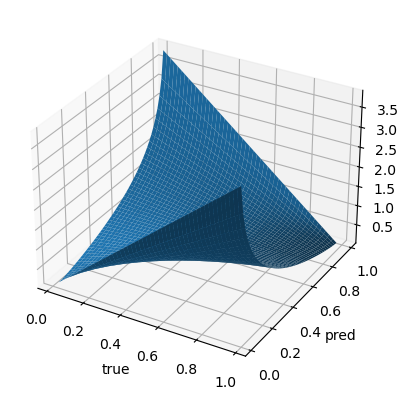

In [7]:
x_axis = space
y_axis = space

x_axis, y_axis = np.meshgrid(space, space)
# vals = -(x_axis * np.log(y_axis) + (1 - x_axis) * np.log(1 - y_axis))
vals = BCE_plotting(x_axis, y_axis)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(x_axis, y_axis, vals)
plt.xlabel('true')
plt.ylabel('pred')
plt.show()

## L1

$$
\sum_{i=1}^N |y_i - p_i|
$$

In [8]:
arr1 = np.array([1,1,1])
arr2 = np.array([1,-5,11])
np.linalg.norm(arr1-arr2, ord=1)

16.0

In [9]:
def L1(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
    return np.linalg.norm(y_pred - y_true, ord=1)

def L1_plotting(true, pred):
    return -(true * np.log(pred) + (1 - true) * np.log(1 - pred))

In [10]:
L1(y_true, y_pred)

5.407794598075302

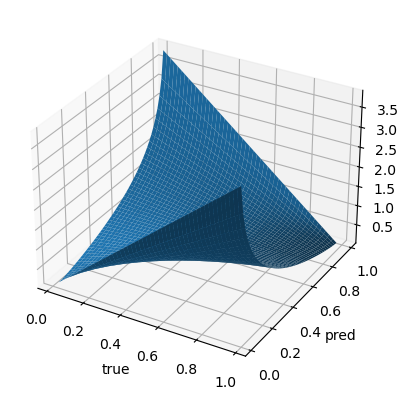

In [11]:
vals = L1_plotting(x_axis, y_axis)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(x_axis, y_axis, vals)
plt.xlabel('true')
plt.ylabel('pred')
plt.show()

## SE

$$
\frac{1}{N}\sum_{i=1}^N (y_i - p_i)^2
$$

In [12]:
def SE(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
    return (np.linalg.norm(y_pred - y_true, ord=2))/y_true.shape[0]

def SE_plotting(true, pred):
    return np.square(true - pred)

In [13]:
SE(y_true, y_pred)

0.19518681574223093

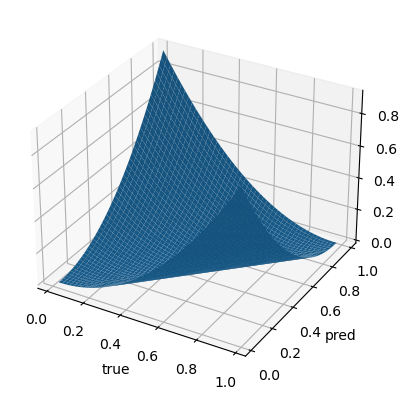

In [14]:
vals = SE_plotting(x_axis, y_axis)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(x_axis, y_axis, vals)
plt.xlabel('true')
plt.ylabel('pred')
plt.show()

## KLDiv

$$
\sum_{i=1}^N y_i (log(y_i)  - log(p_i))
$$

In [15]:
eps = 1e-5
def KLDiv(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
    return np.sum(y_true * (np.log(np.clip(y_true, eps, 1-eps)) - np.log(np.clip(y_pred, eps, 1-eps))))

def KLDiv_plotting(true, pred):
    return true * (np.log(np.clip(true, eps, 1-eps)) - np.log(np.clip(pred, eps, 1-eps)))

In [16]:
KLDiv(y_true, y_pred)

5.066290832329107

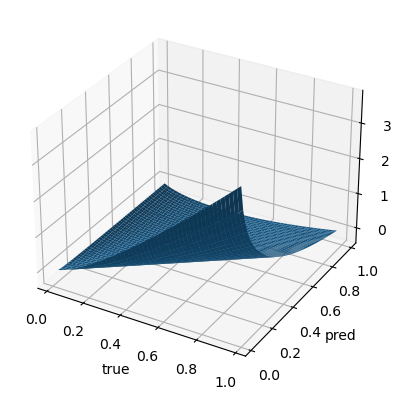

In [17]:

vals = KLDiv_plotting(x_axis, y_axis)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(x_axis, y_axis, vals)
plt.xlabel('true')
plt.ylabel('pred')
plt.show()

## Huber

$$
\sum_{i=1}^N \begin{cases}
0.5(y_i-p_i)^2, |y_i-p_i|<\delta\\
\delta \cdot (|y_i-p_i| - 0.5 \cdot \delta), otherwise
\end{cases}
$$

Creates a criterion that uses a squared term if the absolute element-wise error falls below delta and a delta-scaled L1 term otherwise. This loss combines advantages of both L1Loss and MSELoss; the delta-scaled L1 region makes the loss less sensitive to outliers than MSELoss, while the L2 region provides smoothness over L1Loss near 0. 

In [18]:
def Huber(y_true: np.ndarray, y_pred: np.ndarray, delta=1.) -> np.ndarray:
    abs_diff = np.abs(y_true - y_pred)
    return np.sum(np.where(abs_diff < delta, 0.5 * (y_pred - y_true) ** 2, delta * (abs_diff - 0.5 * delta)))

def Huber_plotting(y_true, y_pred, delta=1.):
    abs_diff = np.abs(y_true - y_pred)
    return np.where(abs_diff < delta, 0.5 * (y_pred - y_true) ** 2, delta * (abs_diff - 0.5 * delta))

In [19]:
Huber(y_true, y_pred, 0.5)

1.6494112653084851

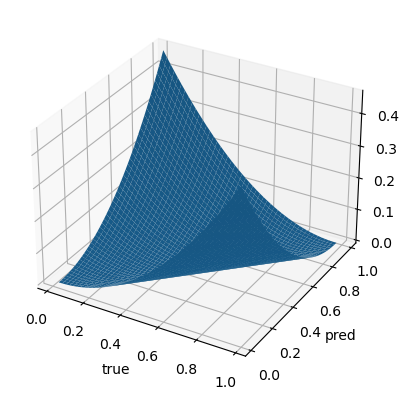

In [20]:
vals = Huber_plotting(x_axis, y_axis)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(x_axis, y_axis, vals)
plt.xlabel('true')
plt.ylabel('pred')
plt.show()

## SmoothL1

$$
\sum_{i=1}^N \begin{cases}
\frac{0.5(y_i-p_i)^2}{\beta}, |y_i-p_i|<\beta\\
|y_i-p_i| - 0.5 \cdot \beta, otherwise
\end{cases}
$$


In [21]:
def SmoothL1(y_true: np.ndarray, y_pred: np.ndarray, beta=1.0) -> np.ndarray:
    abs_diff = np.abs(y_true - y_pred)
    return np.sum(np.where(abs_diff < beta, 0.5 * (y_pred - y_true) ** 2 / beta, abs_diff - 0.5 * beta))

def SmoothL1_plotting(y_true, y_pred, beta=1.):
    abs_diff = np.abs(y_true - y_pred)
    return np.where(abs_diff < beta, 0.5 * (y_pred - y_true) ** 2 / beta, abs_diff - 0.5 * beta)

In [22]:
SmoothL1(y_true, y_pred)

1.9048946519795804

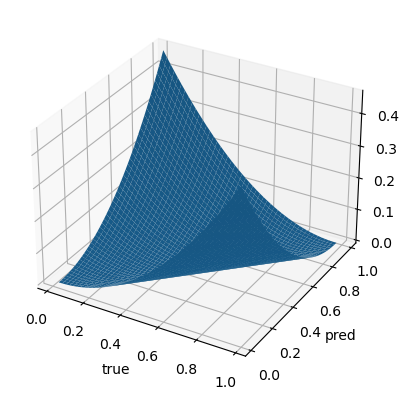

In [23]:
vals = SmoothL1_plotting(x_axis, y_axis)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(x_axis, y_axis, vals)
plt.xlabel('true')
plt.ylabel('pred')
plt.show()

## Wing

original paper: https://arxiv.org/pdf/1711.06753.pdf
$$
\sum_{i=1}^N  \begin{cases}w \cdot log(1+\frac{|x|}{\epsilon}),|x|<w \\
|x| - C
\end{cases}\\


C = w - w \cdot log(1+\frac{|x|}{\epsilon})
$$

In [24]:
def Wing(y_true: np.ndarray, y_pred: np.ndarray, w=1, eps=1e-5) -> np.ndarray:
    abs_diff = np.abs(y_true - y_pred)
    C = w - w*np.log(1 + abs_diff / eps)
    return np.sum(np.where(abs_diff < w, w * np.log(1 + abs_diff / eps), abs_diff - C))

def Wing_plotting(y_true, y_pred, w=1, eps=1e-5):
    abs_diff = np.abs(y_true - y_pred)
    C = w - w*np.log(1 + abs_diff / eps)
    return np.where(abs_diff < w, w * np.log(1 + abs_diff / eps), abs_diff - C)


In [25]:
Wing(y_true, y_pred)

106.22262012312176

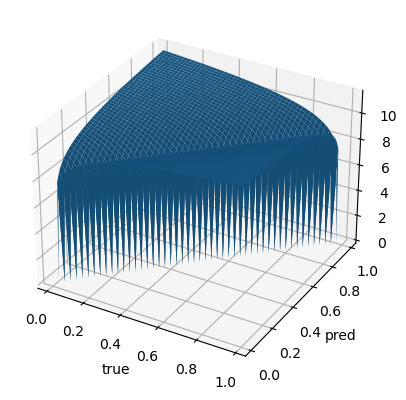

In [26]:
vals = Wing_plotting(x_axis, y_axis)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(x_axis, y_axis, vals)
plt.xlabel('true')
plt.ylabel('pred')
plt.show()

## Softmargin

$$
- \frac{1}{N}\sum_{i=1}^N log(1+exp(-y_i \cdot p_i))
$$

In [27]:
def Softmargin(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
    return np.sum(np.log(1 + np.exp(-y_pred * y_true)))

def Softmargin_plotting(y_true, y_pred):
    return np.log(1 + np.exp(-y_pred * y_true))

In [28]:
Softmargin(y_true, y_pred)

6.161039119841165

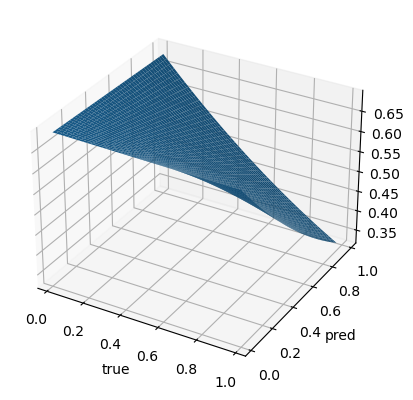

In [29]:

vals = Softmargin_plotting(x_axis, y_axis)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(x_axis, y_axis, vals)
plt.xlabel('true')
plt.ylabel('pred')
plt.show()